In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [13]:

# Load the dataset (Assuming a CSV file)
url = "./datasets/weather_prediction_dataset.csv"  # Update with the correct path
data = pd.read_csv(url)


In [14]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Basic information about the dataset
print("\nBasic Info about the dataset:")
print(data.info())

# Statistical summary of the dataset
print("\nStatistical Summary of the data:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Correlation matrix
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
print(corr_matrix)

First few rows of the data:
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1         

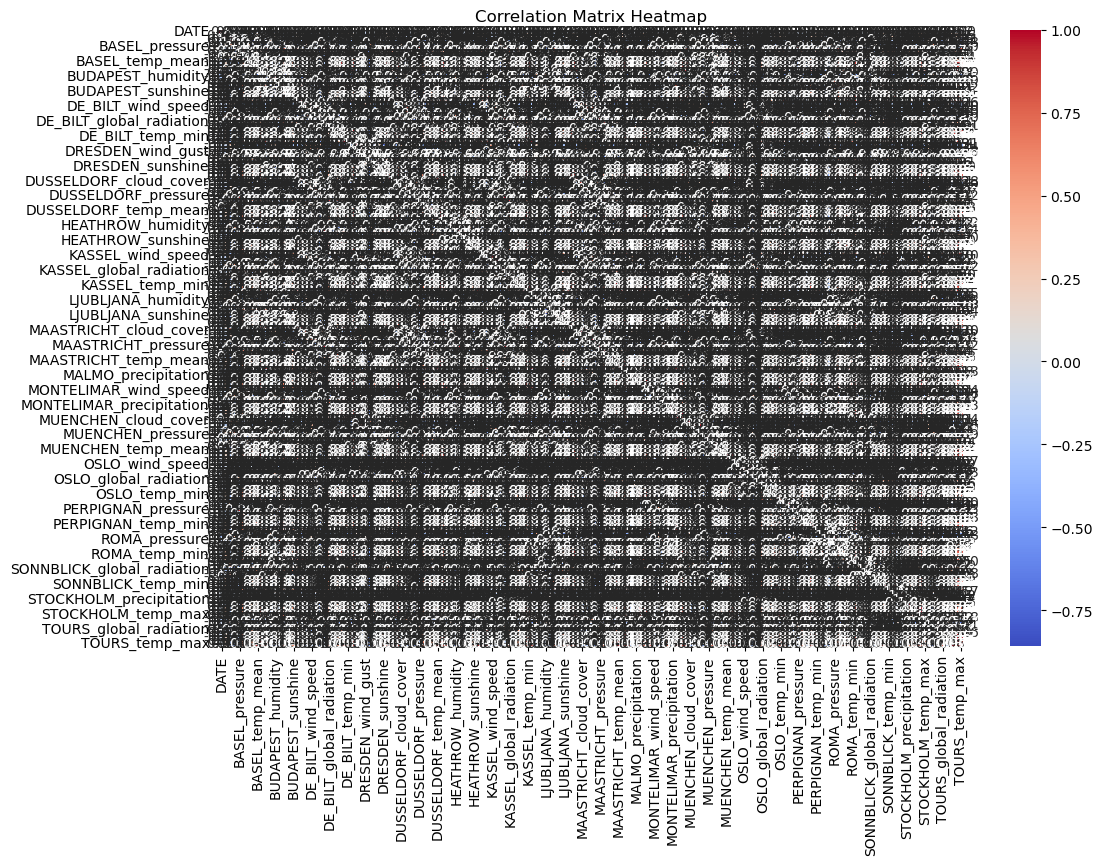

In [16]:

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()



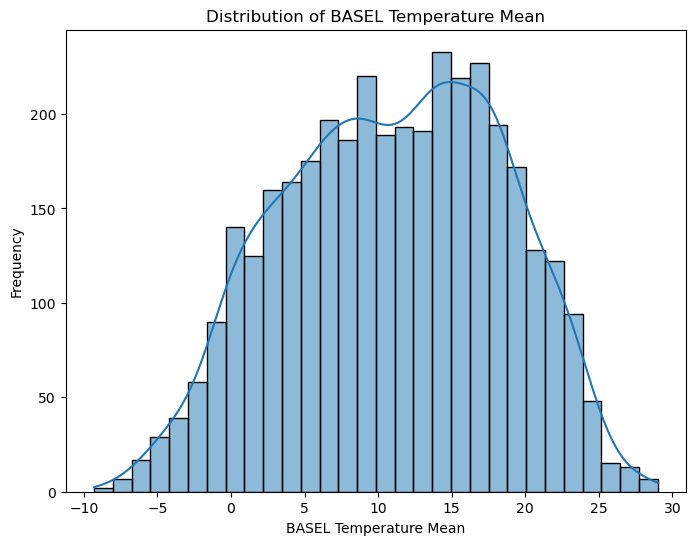

In [17]:

# Visualizing the distribution of BASEL temperature mean
plt.figure(figsize=(8, 6))
sns.histplot(data['BASEL_temp_mean'], kde=True, bins=30)
plt.title('Distribution of BASEL Temperature Mean Boi')
plt.xlabel('BASEL Temperature Mean')
plt.ylabel('Frequency')
plt.show()


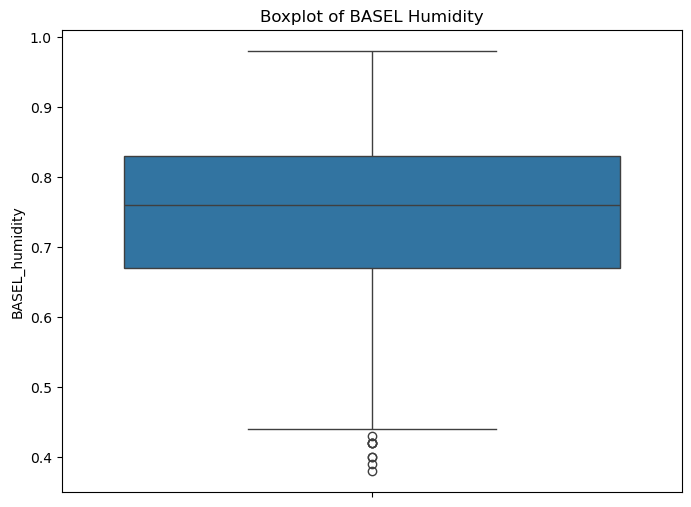

In [18]:

# Boxplot for BASEL humidity
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['BASEL_humidity'])
plt.title('Boxplot of BASEL Humidity')
plt.show()


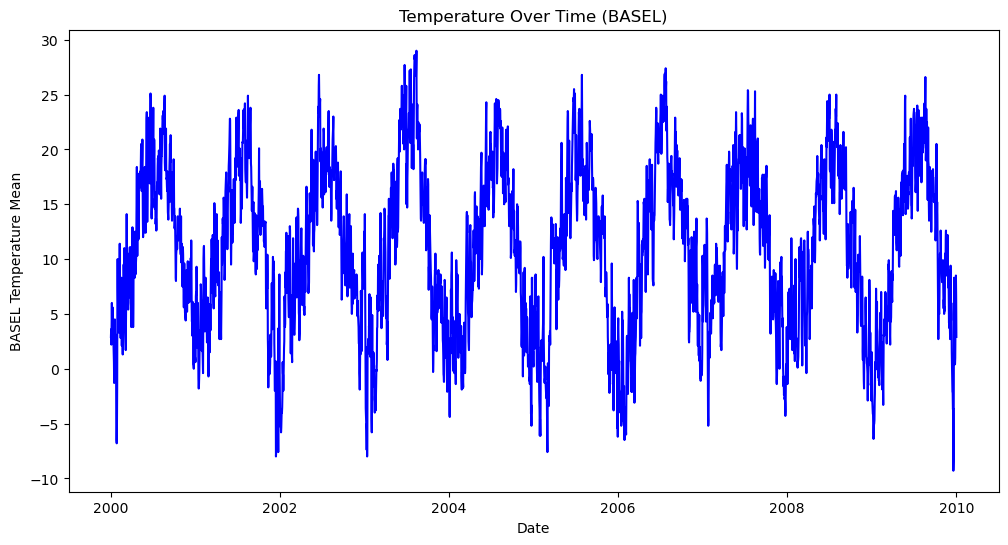

In [19]:

# Time series plot of temperature over time (assuming DATE is in YYYYMMDD format)
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['BASEL_temp_mean'], color='blue')
plt.title('Temperature Over Time (BASEL)')
plt.xlabel('Date')
plt.ylabel('BASEL Temperature Mean')
plt.show()


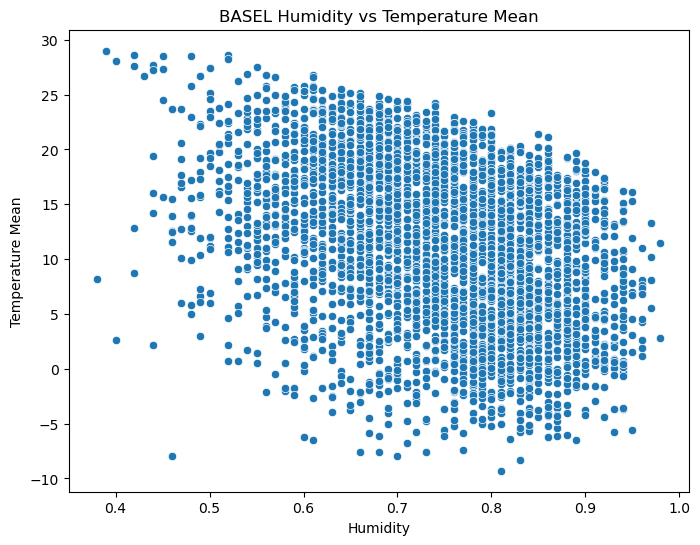

In [20]:

# Scatter plot to visualize the relationship between humidity and temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['BASEL_humidity'], y=data['BASEL_temp_mean'])
plt.title('BASEL Humidity vs Temperature Mean')
plt.xlabel('Humidity')
plt.ylabel('Temperature Mean')
plt.show()


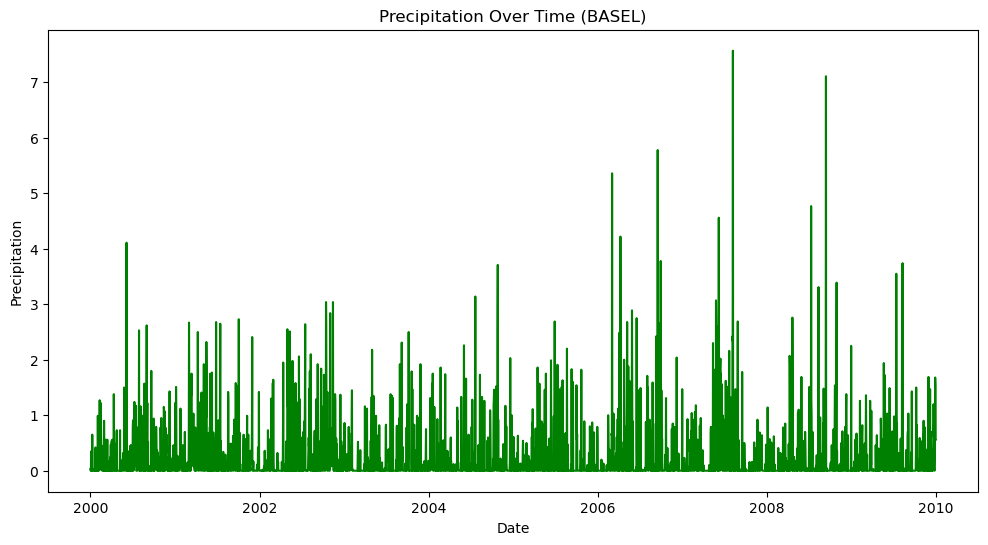

In [21]:

# Analyzing precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['BASEL_precipitation'], color='green')
plt.title('Precipitation Over Time (BASEL)')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()